In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simple-linear-regression-placement-data/placement.csv


In [11]:
# read csv file 
df=pd.read_csv('/kaggle/input/advertise/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<Axes: >

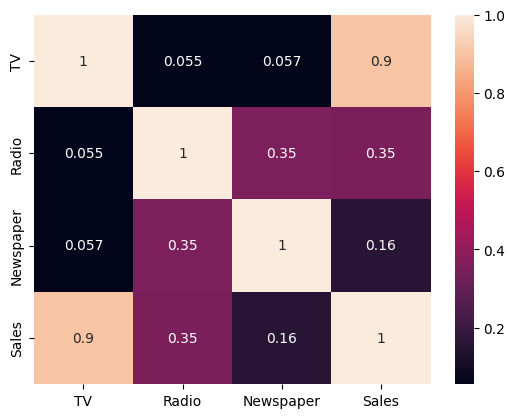

In [14]:
# for selecting best independent variable 
sns.heatmap(df.corr(),annot=True)
# we select TV for independent variable 

<Axes: xlabel='TV', ylabel='Sales'>

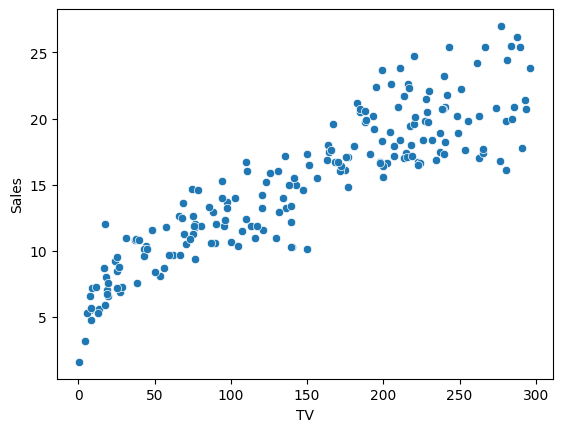

In [82]:
# dependent variable y(sales) and independent variable x(TV)

sns.scatterplot(y=df['Sales'],x=df['TV'])

In [76]:
x=df[['TV']]
y=df['Sales']

# split dataset into two parts 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# select model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [77]:
# fit the model on trainning data 
model.fit(X_train, y_train)

LinearRegression()

In [78]:
# check on test data 
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [79]:
# check model accuracy
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

print("mean absolute error :",mean_absolute_error(y_test,y_pred))


print("In percentage :",mean_absolute_percentage_error(y_test,y_pred))

# model gives only 14% error 


print("mean squared error: ",mean_squared_error(y_test,y_pred))

mean absolute error : 1.8069123776641511
In percentage : 0.14476895433865355
mean squared error:  5.179525402166651


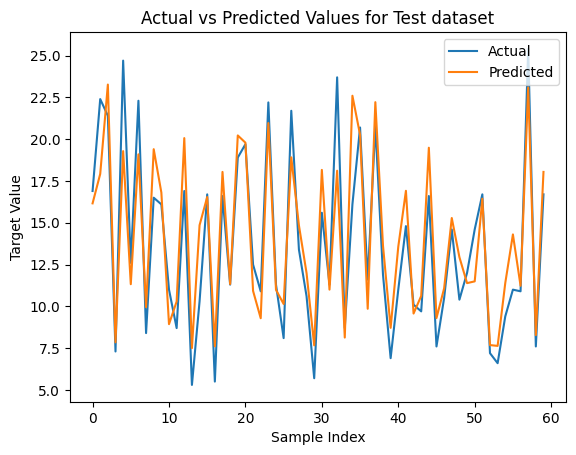

In [80]:
# visualize original value and predicted value for test data

plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted Values for Test dataset")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()

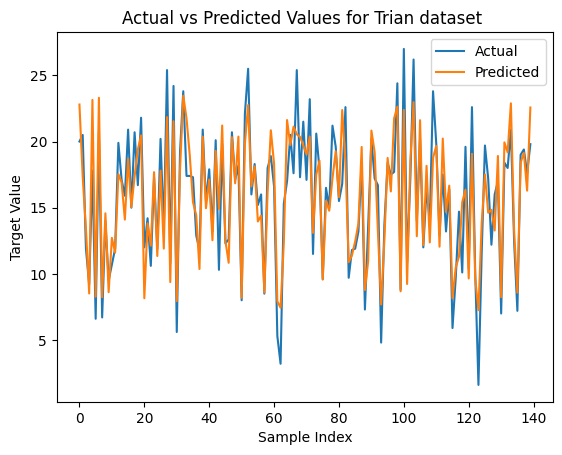

In [81]:
# visualize original value and predicted value for train data

plt.plot(y_train.values, label='Actual')
plt.plot(y_pred_train, label='Predicted')
plt.title("Actual vs Predicted Values for Trian dataset ")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()

<Axes: xlabel='TV', ylabel='Sales'>

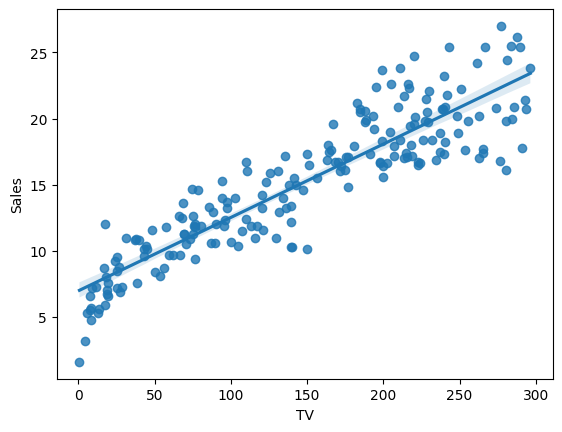

In [83]:
# this is regression line plot tv and sales 
sns.regplot(y=df['Sales'],x=df['TV'])

In [84]:
# we get our intercet for best fit line 
model.intercept_

7.206554548173251

In [86]:
# we get our slop for best fit line 
model.coef_

array([0.05483488])

This two value was achieved when model is trainning , during the trainning model select the best two value so that diff btw predicted and actual value of y is minimum. 